# Perform intersection of top genes for different token lengths

In [1]:
import pandas as pd


pd.set_option("display.max_columns", None) # show all cols
pd.set_option('display.max_colwidth', None) # show full width of showing cols
pd.set_option("display.expand_frame_repr", False) # print cols side by side as it's supposed to be

## Read bed files containing tokens

In [2]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files', 'ECOLI')

bedDfList = []
for bedFile in os.listdir(bedDir):
    tubeid = bedFile.split('.')[0].split('_')[0]
    tokensDf = pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score'])
    tokensDf['tube_id'] = tubeid
    bedDfList.append(tokensDf)

bedDf = pd.concat(bedDfList, ignore_index=True)
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id
0,1,1,3,GAA,0.024555,AH21B049
1,1,4,12,AAACCCCGG,0.019281,AH21B049
2,1,13,17,TCAAT,0.042749,AH21B049
3,1,18,22,AAGGC,0.058446,AH21B049
4,1,23,27,CGGGG,-0.002272,AH21B049
...,...,...,...,...,...,...
247349726,5,259913,259920,GCTACCCG,0.012245,ALF22C077
247349727,5,259921,259928,TTGGTGTG,0.000125,ALF22C077
247349728,5,259929,259938,CCTGTTCCGT,-0.000540,ALF22C077
247349729,5,259939,259942,GGCC,0.024973,ALF22C077


## Calculate token lengths

In [3]:
bedDf['token_length'] = bedDf.tokens.apply(lambda x: len(x))
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
0,1,1,3,GAA,0.024555,AH21B049,3
1,1,4,12,AAACCCCGG,0.019281,AH21B049,9
2,1,13,17,TCAAT,0.042749,AH21B049,5
3,1,18,22,AAGGC,0.058446,AH21B049,5
4,1,23,27,CGGGG,-0.002272,AH21B049,5
...,...,...,...,...,...,...,...
247349726,5,259913,259920,GCTACCCG,0.012245,ALF22C077,8
247349727,5,259921,259928,TTGGTGTG,0.000125,ALF22C077,8
247349728,5,259929,259938,CCTGTTCCGT,-0.000540,ALF22C077,10
247349729,5,259939,259942,GGCC,0.024973,ALF22C077,4


## Calculate counts of token lengths

In [4]:
tokenlengthCountDf = bedDf.token_length.value_counts().reset_index().sort_values(by=['token_length'], ascending=True)
tokenlengthCountDf

,token_length,count
11,1,322207
9,2,1751088
7,3,8283051
6,4,13288147
4,5,25414480
0,6,60552510
1,7,45341597
2,8,34858185
3,9,33305012
5,10,17681732


## Plot counts of token lengths

<Axes: xlabel='token_length', ylabel='count'>

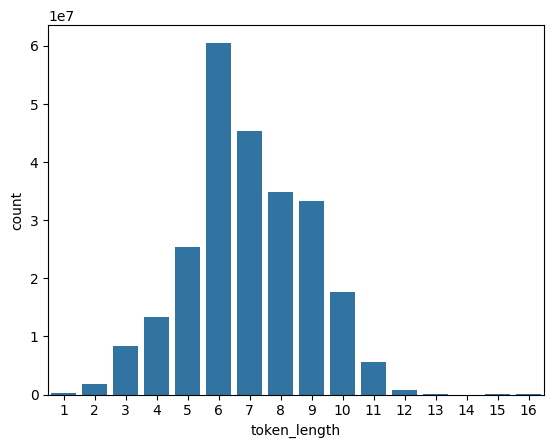

In [5]:
import seaborn as sns

sns.barplot(tokenlengthCountDf, x='token_length', y='count')

## Obtain token overlaps with annotations

In [6]:
import os
import pandas as pd
from pathlib import Path


overlappingFilesDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'overlapping_with_annotations', 'ECOLI')

overlappingDfList = []
for overlappingFile in os.listdir(overlappingFilesDir):
    df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'atributes'])
    df['tube_code'] = [overlappingFile.split('_')[0]]*df.shape[0]
    overlappingDfList.append(df)
overlappingDf = pd.concat(overlappingDfList, ignore_index=True)
overlappingDf


,contig_id,start_position,end_position,tokens,score,feature_type,id,name,gene,atributes,tube_code
0,1,665,671,GAATCAT,0.037687,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
1,1,672,680,TTTATGAAT,0.023426,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
2,1,681,683,AAC,-0.010186,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
3,1,684,689,AAAACC,0.024358,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
4,1,690,698,TTCACCCAG,0.031550,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yaiS,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
...,...,...,...,...,...,...,...,...,...,...,...
92771815,5,357109,357119,CGGCAGACGAA,0.017858,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,"ID=KCGHAI_11840;Name=Phage-related protein%2C tail assembly protein I;locus_tag=KCGHAI_11840;product=Phage-related protein%2C tail assembly protein I;Dbxref=COG:COG4723,COG:X,RefSeq:WP_000847668.1,SO:0001217,UniParc:UPI00016DBD2D,UniRef:UniRef100_A0A0A6RKN9,UniRef:UniRef50_F4V9K2,UniRef:UniRef90_A0A369FJA2",AH19F069
92771816,5,357120,357125,GGGGAT,0.030131,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,"ID=KCGHAI_11840;Name=Phage-related protein%2C tail assembly protein I;locus_tag=KCGHAI_11840;product=Phage-related protein%2C tail assembly protein I;Dbxref=COG:COG4723,COG:X,RefSeq:WP_000847668.1,SO:0001217,UniParc:UPI00016DBD2D,UniRef:UniRef100_A0A0A6RKN9,UniRef:UniRef50_F4V9K2,UniRef:UniRef90_A0A369FJA2",AH19F069
92771817,5,357126,357131,GGTGGT,0.045921,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,"ID=KCGHAI_11840;Name=Phage-related protein%2C tail assembly protein I;locus_tag=KCGHAI_11840;product=Phage-related protein%2C tail assembly protein I;Dbxref=COG:COG4723,COG:X,RefSeq:WP_000847668.1,SO:0001217,UniParc:UPI00016DBD2D,UniRef:UniRef100_A0A0A6RKN9,UniRef:UniRef50_F4V9K2,UniRef:UniRef90_A0A369FJA2",AH19F069
92771818,5,357132,357138,CAGGTTG,-0.022747,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,"ID=KCGHAI_11840;Name=Phage-related protein%2C tail assembly protein I;locus_tag=KCGHAI_11840;product=Phage-related protein%2C tail assembly protein I;Dbxref=COG:COG4723,COG:X,RefSeq:WP_000847668.1,SO:0001217,UniParc:UPI00016DBD2D,UniRef:UniRef100_A0A0A6RKN9,UniRef:UniRef50_F4V9K2,UniRef:UniRef90_A0A369FJA2",AH19F069


In [42]:
import pandas as pd

from pathlib import Path


for tokenLengthCutoff in range(5, 15):
    tokensDf = bedDf[bedDf.token_length > tokenLengthCutoff]
    signatureTokens = list(tokensDf.sort_values(by=['score'], ascending=False).tokens.unique()[:10])
    tokenOverlapsDfs = []
    for signatureToken in signatureTokens:
        tokenOverlapsDf = overlappingDf[overlappingDf.tokens == signatureToken]
        tokenOverlapsDfs.append(tokenOverlapsDf)
    finalTokenOverlapsDf = pd.concat(tokenOverlapsDfs, ignore_index=True)
    finalTokenOverlapsDf.drop_duplicates().to_csv(Path(os.environ['GENOMICS_DATA_BASE'], 'survival_analysis', 'ECOLI', 'overlaping_annotations_tl_' + str(tokenLengthCutoff) + '.csv'), index=False)

## Create data for an upset plot

In [43]:
import os

from pathlib import Path


overlappingGenesDict = {}
overlappingAnnotationsDict = {}

for tokenLengthCutoff in range(5, 15):
    overlappingGenesPath = Path(os.environ['GENOMICS_DATA_BASE'], 'survival_analysis', 'ECOLI', 'overlaping_annotations_tl_' + str(tokenLengthCutoff) + '.csv')
    overlappingGenesDf = pd.read_csv(overlappingGenesPath)
    overlappingGenesDict['Token Length > ' + str(tokenLengthCutoff)] = overlappingGenesDf.gene.unique()
    overlappingAnnotationsDict['Token Length > ' + str(tokenLengthCutoff)] = overlappingGenesDf


## Generate upset plot

/home/vmadmin/workspace/alfred-data-analysis/.venv/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/vmadmin/workspace/alfred-data-analysis/.venv/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the 

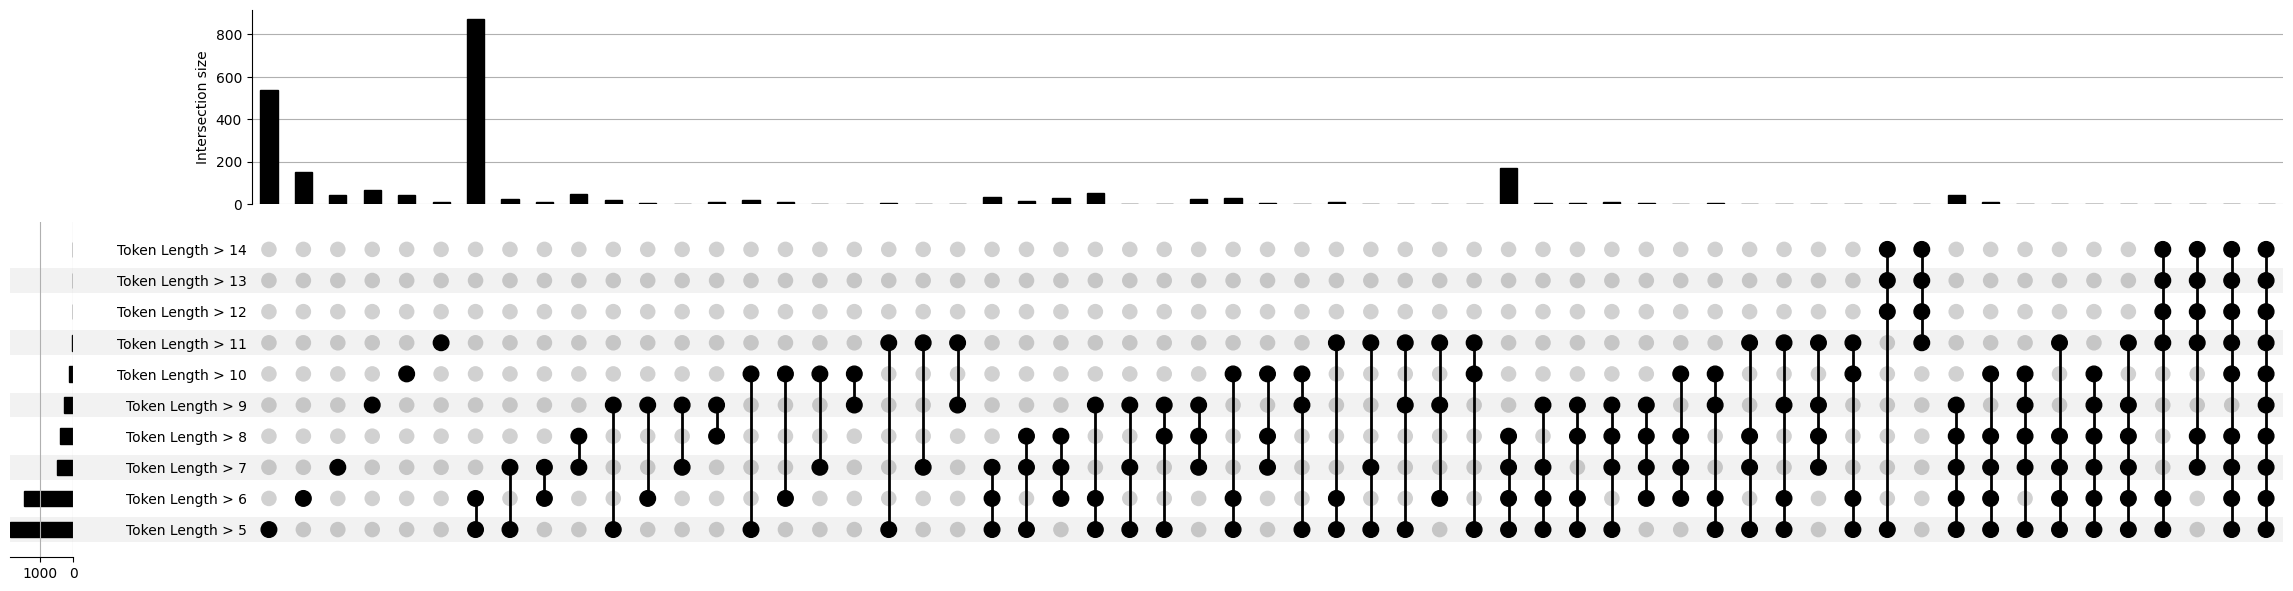

In [44]:
from upsetplot import UpSet

from upsetplot import from_contents


ax_dict = UpSet(from_contents(overlappingGenesDict)).plot()

## Draw bar plot showing the number of overlapping genes for different token length cutoffs

[Text(0.5, 0, 'Token length cutoff'),
 Text(0, 0.5, 'Annotations counts'),
 Text(0.5, 1.0, 'Annotations counts vs Token length cutoff')]

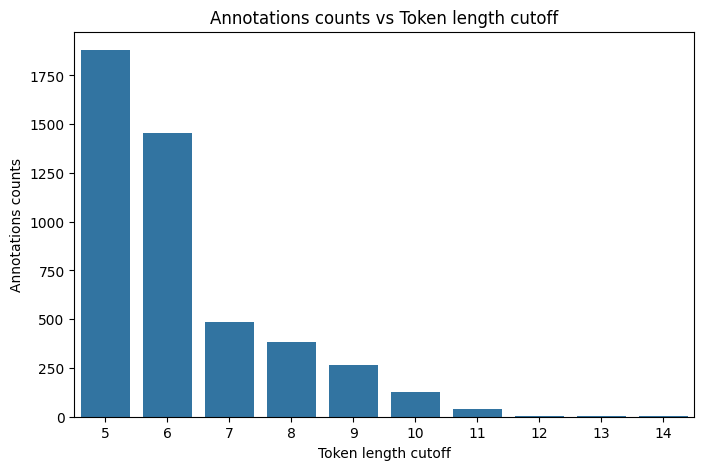

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns


f, ax = plt.subplots(1, 1, figsize=(8, 5))

sns.barplot(
    x=[key.split(' > ')[1] for key in overlappingGenesDict.keys()],
    y=[len(value) for value in list(overlappingGenesDict.values())]
    ).set(
        xlabel='Token length cutoff',
        ylabel='Annotations counts',
        title='Annotations counts vs Token length cutoff'
    )

## Annotations for long sequence lengths

In [46]:
for tokenLengthCutoff in overlappingGenesDict.keys():
    if (int(tokenLengthCutoff.split(' > ')[1]) > 10):
        print(tokenLengthCutoff + ': ' + str(overlappingGenesDict[tokenLengthCutoff]))

Token Length > 11: [nan 'naRNA4' 'yjgR' 'trnV' 'trnA' 'pgtB' 'mepM' 'hsdS' 'pic' 'acrB'
 'corC' 'ascF' 'bioF' 'wzxC' 'nimR' 'tcdA' 'dppF' 'yeaG' 'ulaA' 'epmB'
 'pksD' 'gadB' 'aroD' 'ypdE' 'dgcE' 'trnR' 'tsx' 'trxC' 'fimA' 'rsxE'
 'odhB' 'fimD' 'sapD' 'betA' 'tdcE' 'wcaM' 'patD' 'eptA' 'sfaF' 'elfA'
 'dnaB']
Token Length > 12: [nan 'naRNA4' 'yjgR' 'trnV' 'trnA' 'murA']
Token Length > 13: [nan 'naRNA4' 'yjgR' 'trnV' 'trnA' 'murA']
Token Length > 14: [nan 'naRNA4' 'yjgR' 'trnV' 'trnA' 'murA']


## Investigate if multiple tokens overlap for a single analysis

In [67]:
# for tokenLengthCutoff in overlappingAnnotationsDict.keys():

overlappingAnnotationsDict['Token Length > 14'].groupby(
    by=['gene', 'tokens']
    ).agg(
        {
            'contig_id': 'count',
            'tokens': lambda x: len(x.unique()[0]),
        }
    ).rename(
        columns={
            'contig_id': 'count',
            'tokens': 'token_length'
        }
    )


count  token_length
gene   tokens                               
murA   ATGCCGGATGCGGCG     123            15
naRNA4 AGCGTCGCATCAGGCA   1667            16
       GCGTAAACGCCTTATC     83            16
       TGCCTGATGCGCTACG     28            16
trnA   GCTCAGCTGGGAGAGC    185            16
trnV   GCTCAGCTGGGAGAGC    576            16
yjgR   AGCGTCGCATCAGGCA      1            16

In [68]:
# for tokenLengthCutoff in overlappingAnnotationsDict.keys():

overlappingAnnotationsDict['Token Length > 13'].groupby(
    by=['gene', 'tokens']
    ).agg(
        {
            'contig_id': 'count',
            'tokens': lambda x: len(x.unique()[0]),
        }
    ).rename(
        columns={
            'contig_id': 'count',
            'tokens': 'token_length'
        }
    )


count  token_length
gene   tokens                               
murA   ATGCCGGATGCGGCG     123            15
naRNA4 AGCGTCGCATCAGGCA   1667            16
       GCGTAAACGCCTTATC     83            16
       TGCCTGATGCGCTACG     28            16
trnA   GCTCAGCTGGGAGAGC    185            16
trnV   GCTCAGCTGGGAGAGC    576            16
yjgR   AGCGTCGCATCAGGCA      1            16

In [69]:
# for tokenLengthCutoff in overlappingAnnotationsDict.keys():

overlappingAnnotationsDict['Token Length > 12'].groupby(
    by=['gene', 'tokens']
    ).agg(
        {
            'contig_id': 'count',
            'tokens': lambda x: len(x.unique()[0]),
        }
    ).rename(
        columns={
            'contig_id': 'count',
            'tokens': 'token_length'
        }
    )


count  token_length
gene   tokens                               
murA   ATGCCGGATGCGGCG     123            15
naRNA4 AGCGTCGCATCAGGCA   1667            16
       GCGTAAACGCCTTATC     83            16
       TGCCTGATGCGCTACG     28            16
trnA   GCTCAGCTGGGAGAGC    185            16
trnV   GCTCAGCTGGGAGAGC    576            16
yjgR   AGCGTCGCATCAGGCA      1            16

In [70]:
# for tokenLengthCutoff in overlappingAnnotationsDict.keys():

overlappingAnnotationsDict['Token Length > 11'].groupby(
    by=['gene', 'tokens']
    ).agg(
        {
            'contig_id': 'count',
            'tokens': lambda x: len(x.unique()[0]),
        }
    ).rename(
        columns={
            'contig_id': 'count',
            'tokens': 'token_length'
        }
    )


,,count,token_length
gene,tokens,,
acrB,GTCAACAATCTG,1,12
aroD,CTTTCGCCATCA,1,12
ascF,CTTTCGCCATCA,45,12
betA,AACCTGACCATT,31,12
bioF,CTTTCGCCATCA,116,12
corC,CTTTCGCCATCA,137,12
dgcE,TAGCTCAGCTGG,111,12
dnaB,AACCTGACCATT,1,12
dppF,CTTTCGCCATCA,30,12
